In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from tkinter import font
import pandas as pd

In [13]:
def analyze(setting, requested_latency):
    file_name = setting+"/mlperf_log_trace.json"
    try:
        f = open(file_name, "r")
        lines = f.readlines()
        latencies = []
        for line in lines:
            if "issue_to_done" in line:
                finish = int(line.split(":")[-1].split("}")[0])
                start = int(line.split(":")[-2].split(",")[0])
                latency = (finish + start)/1000000
                latencies.append(latency)
        valid_latency = 0
        latencies.sort()
        for l in latencies:
            if l <requested_latency:
                valid_latency += 1
        latency = latencies[round(len(latencies)*0.99)]
        ddl_meet_rate = valid_latency/len(latencies)*100
        # print(setting, "p99 latency: {:.2f} valid latency: {:.2f}%".format(latency, ddl_meet_rate))
        # print("{:.2f} {:.2f}%".format(latency, ddl_meet_rate))
        return (latency, ddl_meet_rate)
    except:
        print(setting, "file does not exist.")

In [14]:
bert_qps = ["130", "120", "110"]
resnet_qps = ["750", "700", "650"]

ddl_dic = {}
for bert in bert_qps:
    for resnet in resnet_qps:
        folder = "resnet_" + resnet + "qps_bert_" + bert + "qps/"
        ddl_meet_rate_lst = []
        p99_lst = []
        for model in ["bert", "resnet50"]:
            for cache in ["_6_6", "_8_4", "_10_2"]:
                for mb in ["_100_100", "_100_20", "_20_100"]:
                    if model == "resnet50":
                        tpl = analyze("parallel_perf/" + folder + "perf_" + model + cache + mb, 100)
                    elif model == "bert":
                        tpl = analyze("parallel_perf/" + folder + "perf_" + model + cache + mb, 130)
                    p99_lst.append(np.array(tpl[0]))
                    ddl_meet_rate_lst.append(np.array(tpl[1]))
        ddl_dic[folder[:-1]] = [ddl_meet_rate_lst[:9], ddl_meet_rate_lst[9:]]
print(ddl_dic)
                    

{'resnet_750qps_bert_130qps': [[0.36264489006487316, 32.47168658249574, 0.0, 12.253733132634439, 44.80763479866339, 0.020247306385132693, 40.50943985021064, 82.61417855146323, 0.004063719115734721], [0.1594248762516644, 0.06378618869549271, 0.19916090747594803, 0.17257547930142886, 0.06918118271830062, 0.17098070904294718, 0.15543913865171166, 0.06605046912243132, 0.12848874208309344]], 'resnet_700qps_bert_130qps': [[0.10388616263652145, 21.82997867582046, 0.0, 12.513194639301986, 56.922396869352674, 0.0014723854116053417, 74.05611316241094, 87.47026169706582, 0.12550166186266531], [46.74212315648344, 0.08746610688358261, 97.31498033607437, 37.93756169198546, 0.08812786116472333, 93.32425638877253, 0.2679766385622977, 0.08962773794322758, 13.174201878925743]], 'resnet_650qps_bert_130qps': [[0.3389251605953522, 24.13048848669241, 0.014859503395396524, 21.10148997581715, 66.81054657028447, 0.005642783585142551, 45.48692814705997, 86.11692515697924, 0.08703686345924666], [100.0, 0.1068163

/data2/yufenggu/anaconda3/envs/MLPerf_Intel/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


Text(0.5, 1.05, 'MLPerf Bert and Resnet50 Parallel Model Serving')

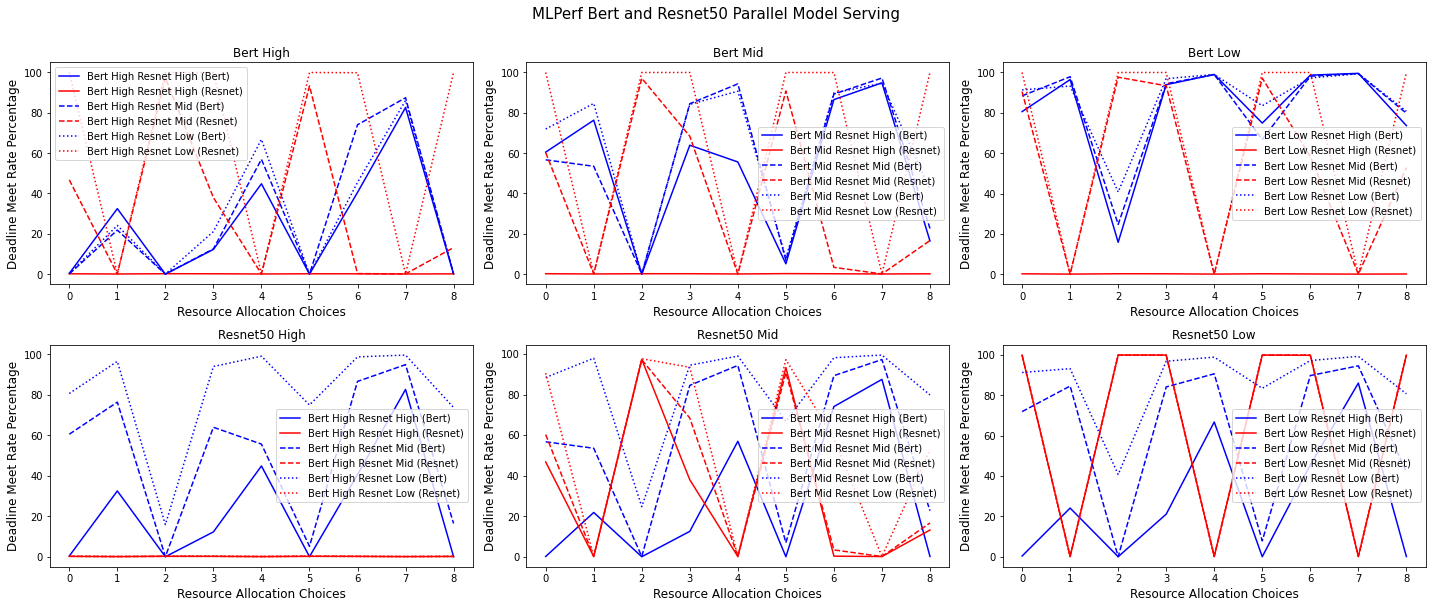

In [42]:
ncol=3
nrow=2
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, constrained_layout=True, figsize=(20,8))

x = np.arange(9)
settings = ["High", "Mid", "Low"]       # col
resources = ["LLC 6-6; MB 100-100",
            "LLC 6-6; MB 100-20",
            "LLC 6-6; MB 20-100",
            "LLC 8-4; MB 100-100",
            "LLC 8-4; MB 100-20",
            "LLC 8-4; MB 20-100",
            "LLC 10-2; MB 100-100",
            "LLC 10-2; MB 100-20",
            "LLC 10-2; MB 20-100"]

# bert
for c in range(ncol):
    for i in range(ncol):
        if i == 0:
            line = "solid"
        elif i == 1:
            line = "dashed"
        else:
            line = "dotted"
        ax[0, c].plot(ddl_dic["resnet_"+resnet_qps[i]+"qps_bert_"+bert_qps[c] + "qps"][0], label="Bert "+settings[c]+" Resnet "+settings[i]+ " (Bert)", color="b", linestyle=line)
        ax[0, c].plot(ddl_dic["resnet_"+resnet_qps[i]+"qps_bert_"+bert_qps[c] + "qps"][1], label="Bert "+settings[c]+" Resnet "+settings[i]+ " (Resnet)", color="r", linestyle=line)
        # ax[0, c].set_xticklabels(resources)
        ax[0, c].set_title("Bert "+settings[c])
        ax[0, c].set_xlabel("Resource Allocation Choices", fontsize=12)
        ax[0, c].set_ylabel("Deadline Meet Rate Percentage", fontsize=12)
        ax[0, c].legend()

# resnet
for c in range(ncol):
    for i in range(ncol):
        if i == 0:
            line = "solid"
        elif i == 1:
            line = "dashed"
        else:
            line = "dotted"
        ax[1, c].plot(ddl_dic["resnet_"+resnet_qps[c]+"qps_bert_"+bert_qps[i] + "qps"][0], label="Bert "+settings[c]+" Resnet "+settings[i]+ " (Bert)", color="b", linestyle=line)
        ax[1, c].plot(ddl_dic["resnet_"+resnet_qps[c]+"qps_bert_"+bert_qps[i] + "qps"][1], label="Bert "+settings[c]+" Resnet "+settings[i]+ " (Resnet)", color="r", linestyle=line)
        # ax[0, c].set_xticklabels(resources)
        ax[1, c].set_title("Resnet50 "+settings[c])
        ax[1, c].set_xlabel("Resource Allocation Choices", fontsize=12)
        ax[1, c].set_ylabel("Deadline Meet Rate Percentage", fontsize=12)
        ax[1, c].legend()

# for axid, log in enumerate(logs):
#     r=axid//ncol
#     c=axid%ncol

#     qps = log.qps
    
#     event_interarrival = np.random.exponential(1000/qps, nevent)
#     # print(event_interarrival)
    
#     event_begin_ts = np.cumsum(event_interarrival[:-1])
#     event_begin_ts = np.append([0], event_begin_ts)
#     # print(event_begin_ts)
    
#     if (nrow > 1):
#         ax[r, c].barh(range(nevent), log.latencies, left=event_begin_ts)
#         ax[r, c].set_title("QPS={}  p99={:.2f}ms".format(qps, log.p99))
#         ax[r, c].set_xlabel("Time/ms")
#         ax[r, c].set_ylabel("Queries")
#     else:
#         ax[c].barh(range(nevent), log.latencies, left=event_begin_ts)
#         ax[c].set_title("QPS={}  p99={:.2f}ms".format(qps, log.p99))
#         ax[c].set_xlabel("Time/ms")
#         ax[c].set_ylabel("Queries")



fig.tight_layout()
fig.suptitle("MLPerf Bert and Resnet50 Parallel Model Serving", y=1.05, fontsize=15)
